In [1]:
# Packages
import os
import gzip
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

In [2]:
# Function to load in the FashionMNIST dataset
def load_mnist(path, kind='train'):

    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [3]:
# Train set
X_train, y_train = load_mnist('/Users/sayakpaul/Downloads/FloydHub Structuring DL Projects/data', kind='train')

In [4]:
# Verify shapes
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [5]:
# Helper function to show 25 images
def show_25_images(X):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(True)
        plt.imshow(X[i].reshape(28,28), cmap=plt.cm.binary)
    plt.show()

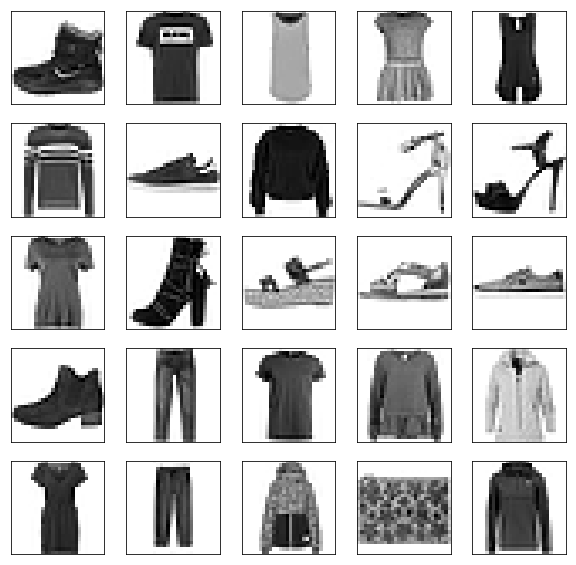

In [6]:
# First 25 images from the train set
show_25_images(X_train[0:25])

```python
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```

In [23]:
batch_1 = ['Ankle boot', 'T-shirt/top', 'T-shirt/top', 'Dress', 'T-shirt/top', 
           'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal',
          'T-shirt/top', 'Ankle boot', 'Sandal', 'Sandal', 'Sneaker', 
           'Ankle boot', 'Trouser', 'T-shirt/top', 'Pullover', 'Pullover',
          'Dress', 'Trouser', 'Pullover', 'Bag', 'Pullover']

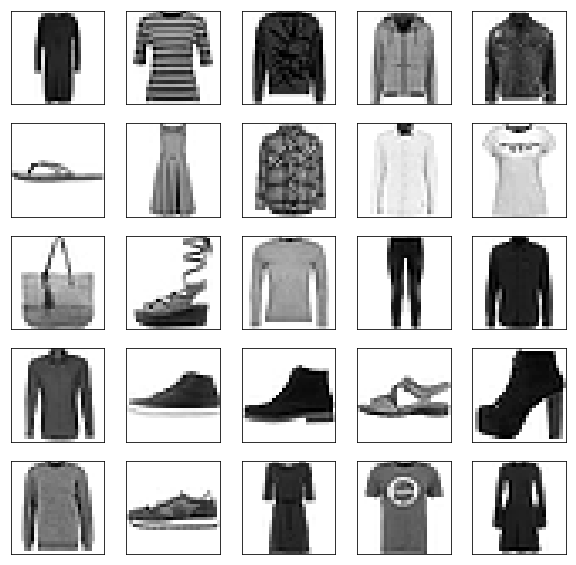

In [9]:
# Second 25 images from the train set
show_25_images(X_train[25:50])

```python
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```

In [24]:
batch_2 = ['Coat', 'Pullover', 'Pullover', 'Pullover', 'Pullover',
          'Sandal', 'Dress', 'Shirt', 'Shirt', 'T-shirt/top',
          'Bag', 'Sandal', 'Pullover', 'Trouser', 'Shirt',
          'Shirt', 'Sneaker', 'Ankle boot', 'Sandal', 'Ankle boot',
          'Pullover', 'Sneaker', 'Dress', 'T-shirt/top', 'Dress']

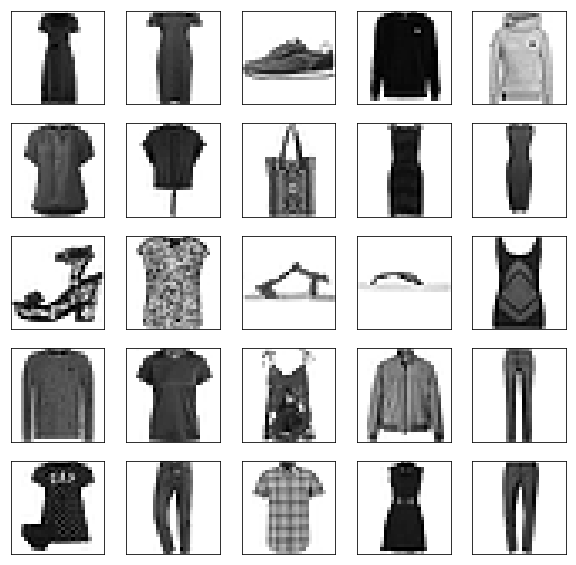

In [11]:
# Third 25 images from the train set
show_25_images(X_train[50:75])

In [25]:
batch_3 = ['Dress', 'Dress', 'Sneaker', 'Pullover', 'Pullover',
          'T-shirt/top', 'Shirt', 'Bag', 'Dress', 'Dress',
          'Sandal', 'T-shirt/top', 'Sandal', 'Sandal', 'T-shirt/top',
          'Pullover', 'T-shirt/top', 'T-shirt/top', 'Coat', 'Trouser',
          'T-shirt/top', 'Trouser', 'Shirt', 'Dress', 'Trouser']

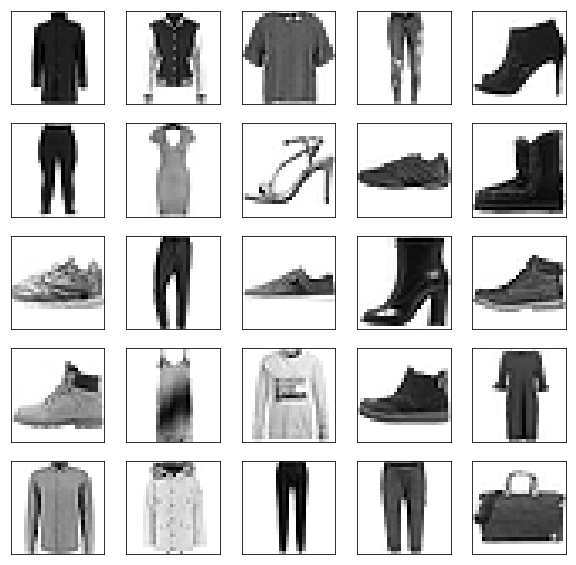

In [13]:
# Fourth 25 images from the train set
show_25_images(X_train[75:100])

In [26]:
batch_4 = ['Coat', 'Shirt', 'T-shirt/top', 'Trouser', 'Ankle boot',
          'Trouser', 'Dress', 'Sandal', 'Sneaker', 'Ankle boot',
          'Sneaker', 'Trouser', 'Sneaker', 'Ankle boot', 'Sneaker',
          'Sneaker', 'T-shirt/top', 'Pullover', 'Sneaker', 'Dress',
          'Shirt', 'Coat', 'Trouser', 'Trouser', 'Bag']

In [27]:
# Concat the four lists
final_batch = batch_1 + batch_2 + batch_3 + batch_4

In [ ]:
import itertools
ab = itertools.chain(batch_1, batch_2, batch_3, batch_4)
list(ab)

In [33]:
# Define an encoding from the original classes to integers
# so that we can check for accuracy

encoding_dict = {'T-shirt/top': 0,
            'Trouser': 1,
            'Pullover': 2,
            'Dress': 3,
            'Coat': 4,
            'Sandal': 5,
            'Shirt': 6,
            'Sneaker': 7,
            'Bag': 8,
            'Ankle boot': 9}

# Define a handy function which will
# take a category and return its encoding
def return_encoding(category):
    return encoding_dict[category]

In [42]:
# Use the function to get all the encodings
# of the manual labels
manual_labels = np.array(list(map(return_encoding, final_batch)))

In [43]:
# Calculate the accuracy score
from sklearn.metrics import accuracy_score

print('The accuracy of the manual labels: {0:.2f}%'\
              .format(accuracy_score(y_train[:100], manual_labels)*100))

The accuracy of the manual labels: 84.00%
